In [23]:
import os
import matplotlib 
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf

%matplotlib inline

## Index and Crypto Historical Data

In [24]:
# Pull index historical data using yfinance API and save to csv
ticker = "^GSPC" 
start= "1990-01-01" 
end= "2022-01-21"

history_df = yf.download(ticker, start=start, end=end, progress=False)
history_df = history_df.asfreq(freq='D').ffill().dropna()
history_df.to_csv('resources/sp_history.csv')

In [25]:
# Read in "Adj Close" and "Date" columns and rename column
sp_historical = pd.read_csv('resources/sp_history.csv', parse_dates=True, usecols=['Date','Adj Close'], index_col='Date')

# Rename column
sp_close = sp_historical.rename(columns={'Adj Close':'S&P_Close'})

# Calculate daily return 
sp_close['S&P_Daily_Ret'] = sp_close['S&P_Close'].pct_change()

# Select date range starting from 2015-08-08 to have the same starting date for all datasets
sp_close = sp_close.loc['2015-08-08':,:]
#sp_close = sp_close.reset_index()
sp_close.tail()

,S&P_Close,S&P_Daily_Ret
Date,,
2022-01-16,4662.850098,0.000000
2022-01-17,4662.850098,0.000000
2022-01-18,4577.109863,-0.018388
2022-01-19,4532.759766,-0.009690
2022-01-20,4482.729980,-0.011037


In [26]:
dji_historical = pd.read_csv('resources/dji_history.csv', parse_dates=True, usecols=['Date','Adj Close'], index_col='Date')

dji_close = dji_historical.rename(columns={'Adj Close':'DJI_Close'})
dji_close['DJI_Daily_Ret'] = dji_close['DJI_Close'].pct_change()

dji_close = dji_close.loc['2015-08-08':,:]
#dji_close = dji_close.reset_index()
dji_close.tail()

,DJI_Close,DJI_Daily_Ret
Date,,
2022-01-02,36338.300781,0.000000
2022-01-03,36585.058594,0.006791
2022-01-04,36799.648438,0.005866
2022-01-05,36407.109375,-0.010667
2022-01-06,36236.468750,-0.004687


In [27]:
ndx_historical = pd.read_csv('resources/ndx_history.csv', parse_dates=True, usecols=['Date','Adj Close'], index_col='Date')

ndx_close = ndx_historical.rename(columns={'Adj Close':'NDX_Close'})
ndx_close['NDX_Daily_Ret'] = ndx_close['NDX_Close'].pct_change()

ndx_close = ndx_close.loc['2015-08-08':,:]
#ndx_close = ndx_close.reset_index()
ndx_close.tail()

,NDX_Close,NDX_Daily_Ret
Date,,
2022-01-02,16320.080078,0.000000
2022-01-03,16501.769531,0.011133
2022-01-04,16279.730469,-0.013455
2022-01-05,15771.780273,-0.031201
2022-01-06,15765.360352,-0.000407


In [28]:
eth_historical = pd.read_csv('resources/ETH-USD.csv', parse_dates=True, usecols=['Date','Adj Close'], index_col='Date')

eth_close = eth_historical.rename(columns={'Adj Close':'ETH_Close'})
eth_close['ETH_Daily_Ret'] = eth_close['ETH_Close'].pct_change()
eth_close = eth_close.dropna()

eth_close = eth_close.loc['2015-08-08':,:]
eth_close.head()

,ETH_Close,ETH_Daily_Ret
Date,,
2017-11-10,299.252991,-0.067411
2017-11-11,314.681000,0.051555
2017-11-12,307.907990,-0.021523
2017-11-13,316.716003,0.028606
2017-11-14,337.631012,0.066037


In [29]:
btc_historical = pd.read_csv('resources/BTC-USD.csv', parse_dates=True, usecols=['Date','Adj Close'], index_col='Date')

btc_close = btc_historical.rename(columns={'Adj Close':'BTC_Close'})
btc_close['BTC_Daily_Ret'] = btc_close['BTC_Close'].pct_change()

btc_close = btc_close.loc['2015-08-08':,:]
btc_close.head()

,BTC_Close,BTC_Daily_Ret
Date,,
2015-08-08,260.997009,-0.066484
2015-08-09,265.083008,0.015655
2015-08-10,264.470001,-0.002313
2015-08-11,270.385986,0.022369
2015-08-12,266.376007,-0.014831


In [30]:
# Concat Close prices into one Dataframe
combined_close = pd.concat([sp_close, dji_close, ndx_close, eth_close, btc_close],axis=1)
# Set "Date" as index and drop NaN2
combined_close = combined_close.astype('float').round(2)
combined_close = combined_close.dropna()
combined_close.to_csv('resources/combined_close.csv')

## Returns Plot

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

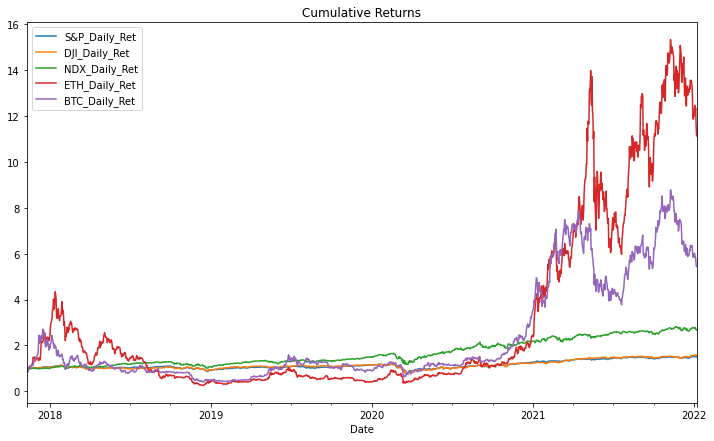

In [31]:
combined_return = combined_close[['S&P_Daily_Ret','DJI_Daily_Ret', 'NDX_Daily_Ret','ETH_Daily_Ret','BTC_Daily_Ret']]
cumulative_ret = (1+combined_return).cumprod()
cumulative_ret.plot(figsize=(12,7), title='Cumulative Returns')

In [32]:
# Cumulative return graph shows that BTC and ETH provided an investor with genereous returns from 2016-2021.

## Correlation Matrix

<Figure size 864x504 with 0 Axes>

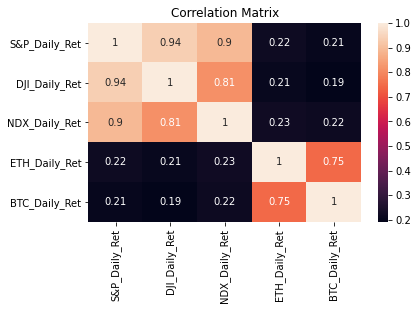

<Figure size 864x504 with 0 Axes>

In [33]:
corr = combined_return.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.subplots_adjust(left=0.20, right=0.99, bottom=0.30, top=0.99)
plt.figure(figsize=(12,7))

In [34]:
# Correlation matrix shows low correlation of cryptos and market indexes. This means they could be used as an effective diversifying asset class.

In [35]:
# Calculate standard dev of daily returns
combined_return_std = combined_return.std()
combined_return_std

S&P_Daily_Ret    0.011124
DJI_Daily_Ret    0.011609
NDX_Daily_Ret    0.012938
ETH_Daily_Ret    0.051855
BTC_Daily_Ret    0.041398
dtype: float64

## Risk Plot

<AxesSubplot:title={'center':'Asset Risk'}>

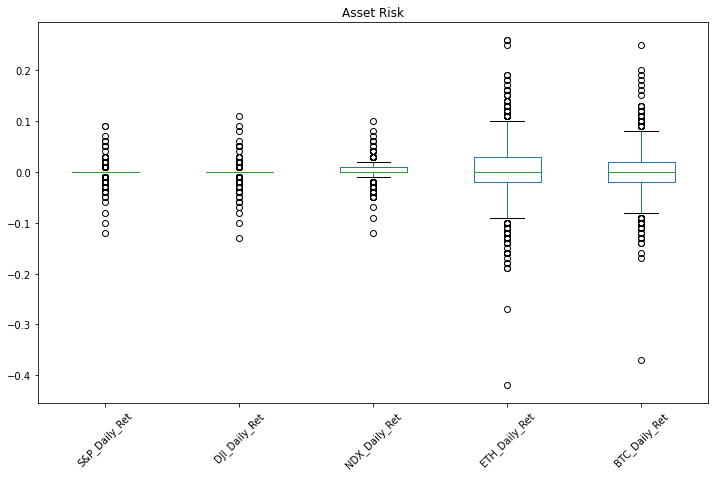

In [36]:
combined_return.plot.box(title="Asset Risk", rot=45, figsize=(12,7))

In [37]:
# Risk plot shows significant ETH and BTC return outliers compared to market indexes. 

In [38]:
# Annualized St Dev (cryptos are traded 365 days but here I assumed 252 days as with index data)
combined_annualized_std = combined_return_std * np.sqrt(252)
combined_annualized_std

S&P_Daily_Ret    0.176585
DJI_Daily_Ret    0.184294
NDX_Daily_Ret    0.205380
ETH_Daily_Ret    0.823174
BTC_Daily_Ret    0.657172
dtype: float64

In [39]:
# Calculate Sharpe Ratios (risk-adjusted returns)
combined_sharpe_ratios = (combined_return.mean() * 252) / (combined_return.std() * np.sqrt(252))
combined_sharpe_ratios

S&P_Daily_Ret    0.469742
DJI_Daily_Ret    0.504104
NDX_Daily_Ret    0.896620
ETH_Daily_Ret    0.904893
BTC_Daily_Ret    0.759854
dtype: float64

## Sharpe Ratio

<AxesSubplot:title={'center':'Sharpe Ratios'}, ylabel='Sharpe Ratio'>

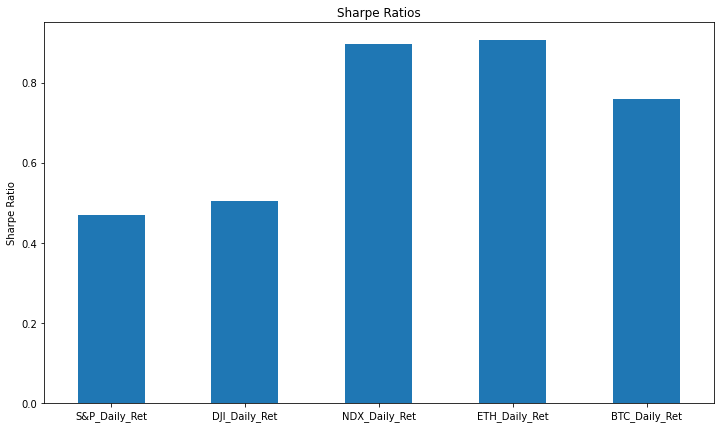

In [40]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios", figsize=(12,7), ylabel='Sharpe Ratio', rot=360)

In [41]:
# ETH and BTC more than compensated the investor for the risk taken compared to investing into market index from 2017-2022.

In [42]:
# Calculate Sortino Ratios (risk-adjusted returns)
combined_sortino_ratios = (combined_return.mean() * 252) / (combined_return[combined_return<0].std() * np.sqrt(252))
combined_sortino_ratios

S&P_Daily_Ret    0.391777
DJI_Daily_Ret    0.406943
NDX_Daily_Ret    0.886243
ETH_Daily_Ret    1.229085
BTC_Daily_Ret    1.025103
dtype: float64

## Sortino Ratio

<AxesSubplot:title={'center':'Sortino Ratios'}, ylabel='Sortino Ratio'>

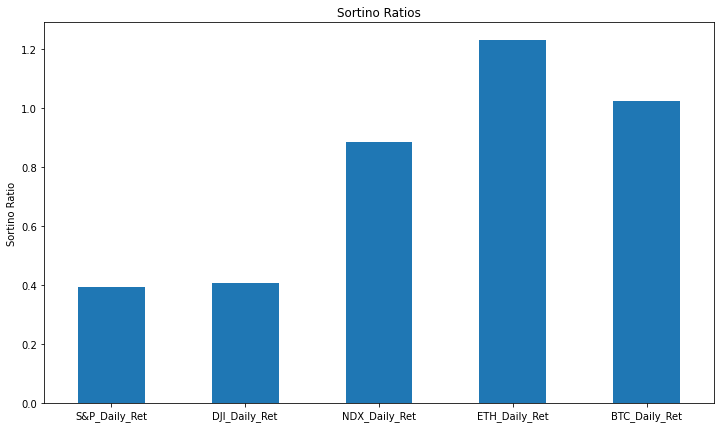

In [43]:
# Visualize the Sortino ratios as a bar plot
combined_sortino_ratios.plot(kind="bar", title="Sortino Ratios", figsize=(12,7), ylabel='Sortino Ratio', rot=360)

In [44]:
# Looking at Sortino ratio that considers downside risk also shows that ETH and then BTC compensated sufficiently an investor for the risk taken from 2017-2022.